In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity


### Test Power Spectrum
#### 200 Hz signal

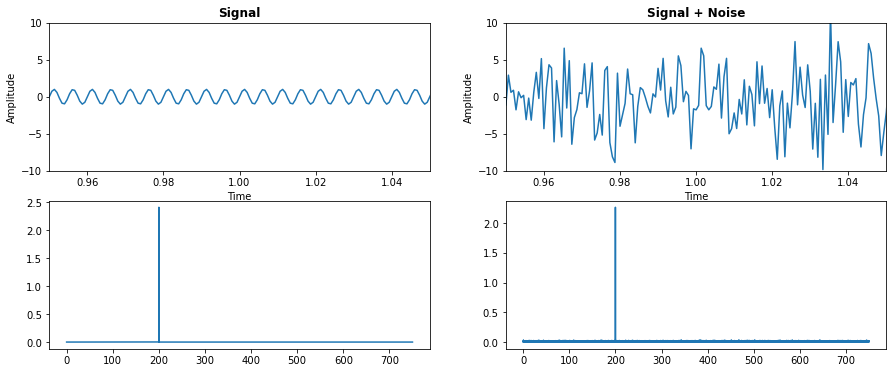

In [4]:
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(time, signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal", fontweight="bold")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 2)
plt.plot(time, signal + noise)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal + Noise", fontweight="bold")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 3)
m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
plt.plot(c.frequencies, c.power().squeeze())


plt.subplot(2, 2, 4)
m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)

plt.plot(c.frequencies, c.power().squeeze())


#### 30 Hz signal

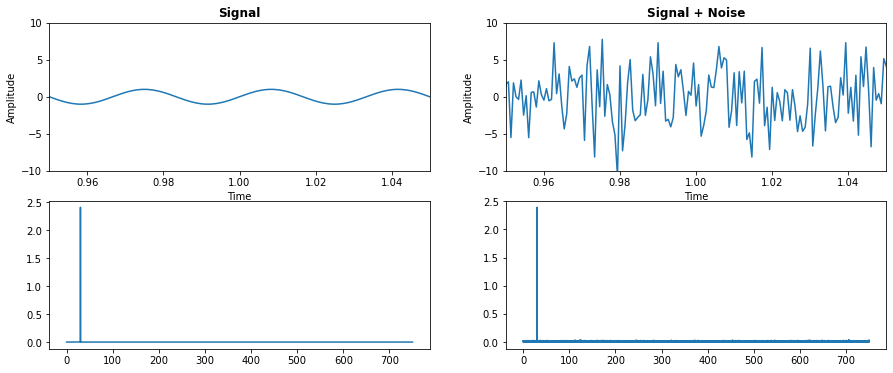

In [5]:
frequency_of_interest = 30
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time * frequency_of_interest)
noise = np.random.normal(0, 4, len(signal))

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(time, signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal", fontweight="bold")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 2)
plt.plot(time, signal + noise)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal + Noise", fontweight="bold")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))

plt.subplot(2, 2, 3)
m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
plt.plot(c.frequencies, c.power().squeeze())


plt.subplot(2, 2, 4)
m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)

plt.plot(c.frequencies, c.power().squeeze())


### Spectrogram

#### No trials, 200 Hz signal with 50 Hz signal starting at 25 seconds

/Users/edeno/miniconda3/envs/spectral_connectivity/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/edeno/miniconda3/envs/spectral_connectivity/lib/python3.7/site-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


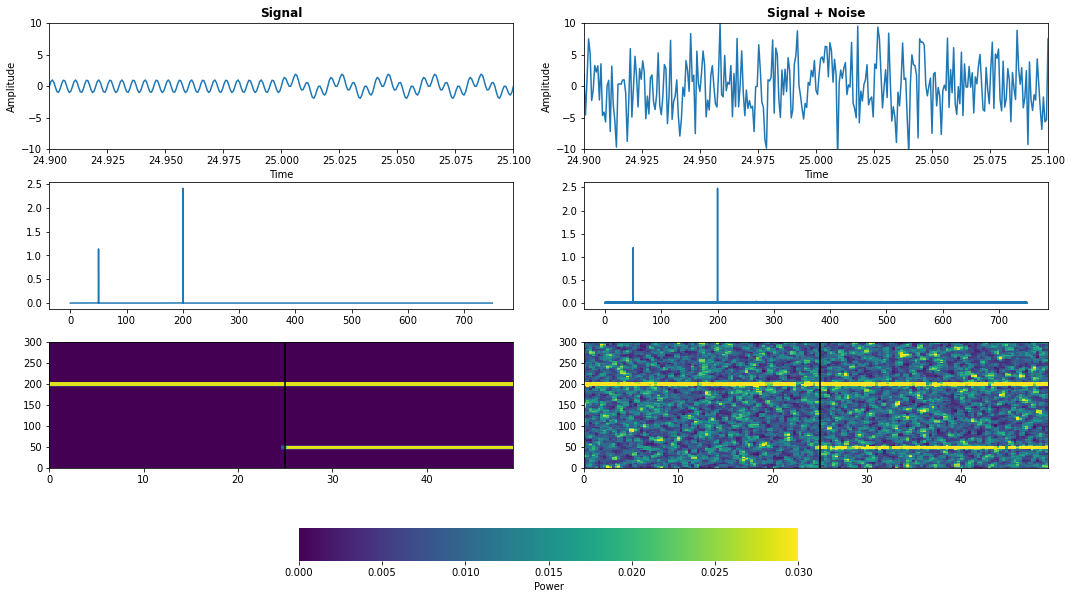

In [6]:
frequency_of_interest = [200, 50]
sampling_frequency = 1500
time_extent = (0, 50)
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[: n_time_samples // 2, 1] = 0
signal = signal.sum(axis=1)
noise = np.random.normal(0, 4, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].set_xlim((24.90, 25.10))
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal + noise)
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].set_xlim((24.90, 25.10))
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.power().squeeze())

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.power().squeeze())


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    time_window_duration=0.600,
    time_window_step=0.300,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
mesh = axes[2, 0].pcolormesh(
    c.time, c.frequencies, c.power().squeeze().T, vmin=0.0, vmax=0.03, cmap="viridis"
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    time_window_duration=0.600,
    time_window_step=0.300,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
mesh = axes[2, 1].pcolormesh(
    c.time, c.frequencies, c.power().squeeze().T, vmin=0.0, vmax=0.03, cmap="viridis"
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

plt.tight_layout()
cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Power",
)
cb.outline.set_linewidth(0)


#### With trial structure (time x trials)

/Users/edeno/miniconda3/envs/spectral_connectivity/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/edeno/miniconda3/envs/spectral_connectivity/lib/python3.7/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


frequency resolution: 33.333333333333336


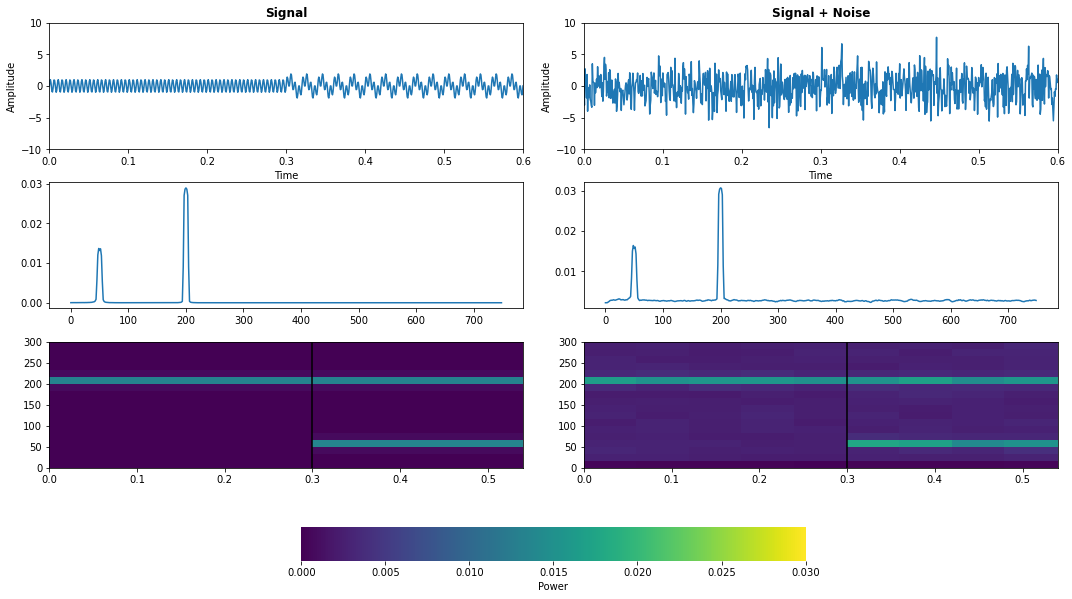

In [7]:
time_halfbandwidth_product = 1

frequency_of_interest = [200, 50]
time_extent = (0, 0.600)
n_trials = 100
sampling_frequency = 1500
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[: n_time_samples // 2, 1] = 0
signal = signal.sum(axis=1)[:, np.newaxis, np.newaxis]
noise = np.random.normal(0, 2, size=(n_time_samples, n_trials, 1))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal.squeeze())
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal[:, 0, 0] + noise[:, 0, 0])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.power().squeeze())

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=3,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.power().squeeze())


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
mesh = axes[2, 0].pcolormesh(
    c.time, c.frequencies, c.power().squeeze().T, vmin=0.0, vmax=0.03, cmap="viridis"
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
mesh = axes[2, 1].pcolormesh(
    c.time, c.frequencies, c.power().squeeze().T, vmin=0.0, vmax=0.03, cmap="viridis"
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

plt.tight_layout()
cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Power",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


#### Decrease frequency resolution by decreasing time_halfbandwidth

/Users/edeno/miniconda3/envs/spectral_connectivity/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/edeno/miniconda3/envs/spectral_connectivity/lib/python3.7/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


frequency resolution: 100.0


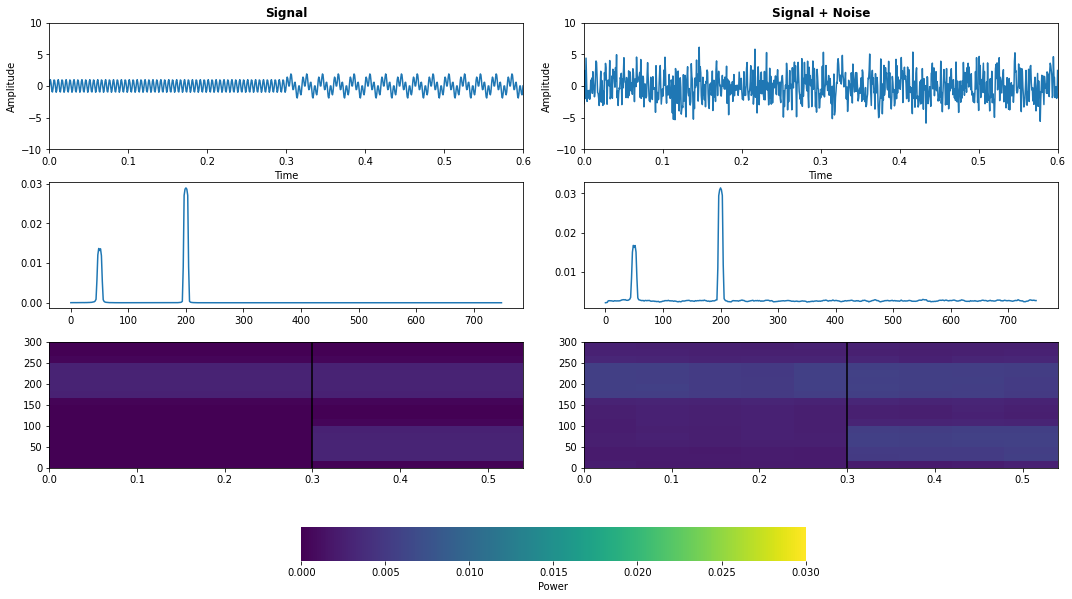

In [8]:
time_halfbandwidth_product = 3

frequency_of_interest = [200, 50]
time_extent = (0, 0.600)
n_trials = 100
sampling_frequency = 1500
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.sin(2 * np.pi * time[:, np.newaxis] * frequency_of_interest)
signal[: n_time_samples // 2, 1] = 0
signal = signal.sum(axis=1)[:, np.newaxis, np.newaxis]
noise = np.random.normal(0, 2, size=(n_time_samples, n_trials, 1))

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes[0, 0].plot(time, signal.squeeze())
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].set_ylim((-10, 10))

axes[0, 1].plot(time, signal[:, 0, 0] + noise[:, 0, 0])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.power().squeeze())

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.power().squeeze())


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
mesh = axes[2, 0].pcolormesh(
    c.time, c.frequencies, c.power().squeeze().T, vmin=0.0, vmax=0.03, cmap="viridis"
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.060,
    time_window_step=0.060,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
mesh = axes[2, 1].pcolormesh(
    c.time, c.frequencies, c.power().squeeze().T, vmin=0.0, vmax=0.03, cmap="viridis"
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].axvline(time[int(np.fix(n_time_samples / 2))], color="black")

plt.tight_layout()
cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Power",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Coherence

#### No trials, 200 Hz, $\pi / 2$ phase offset

No handles with labels found to put in legend.


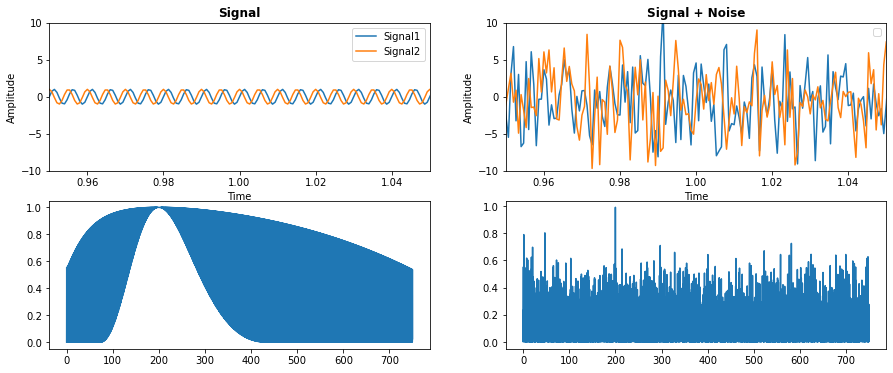

In [9]:
time_halfbandwidth_product = 5
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 50)
n_signals = 2
n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)
signal = np.zeros((n_time_samples, n_signals))
signal[:, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi / 2
signal[:, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 4, signal.shape)

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title("Signal", fontweight="bold")
plt.plot(time, signal[:, 0], label="Signal1")
plt.plot(time, signal[:, 1], label="Signal2")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Signal + Noise", fontweight="bold")
plt.plot(time, signal + noise)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim((0.95, 1.05))
plt.ylim((-10, 10))
plt.legend()

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
plt.subplot(2, 2, 3)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1])


m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
plt.subplot(2, 2, 4)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1])


#### With trial structure (time x trials), 200 Hz, $\pi / 2$ phase offset

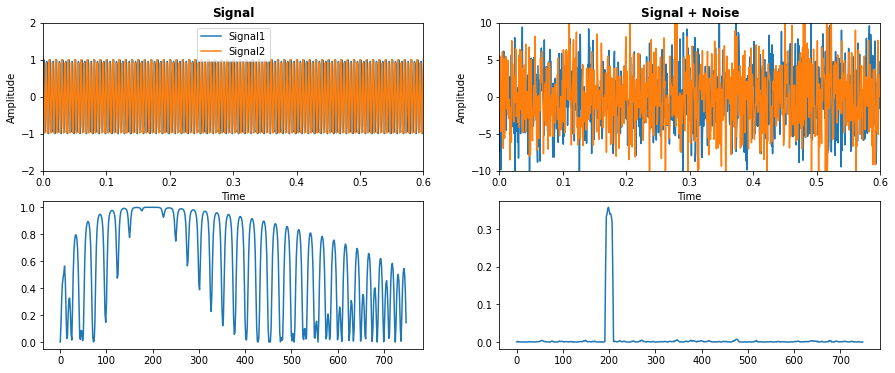

In [10]:
time_halfbandwidth_product = 5
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 0.600)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 4, signal.shape)

plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.title("Signal", fontweight="bold")
plt.plot(time, signal[:, 0, 0], label="Signal1")
plt.plot(time, signal[:, 0, 1], label="Signal2")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(time_extent)
plt.ylim((-2, 2))
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Signal + Noise", fontweight="bold")
plt.plot(time, signal[:, 0, :] + noise[:, 0, :])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(time_extent)
plt.ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
plt.subplot(2, 2, 3)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1])


m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
plt.subplot(2, 2, 4)
plt.plot(c.frequencies, c.coherence_magnitude()[0, :, 0, 1])


### Cohereograms

frequency resolution: 50.0


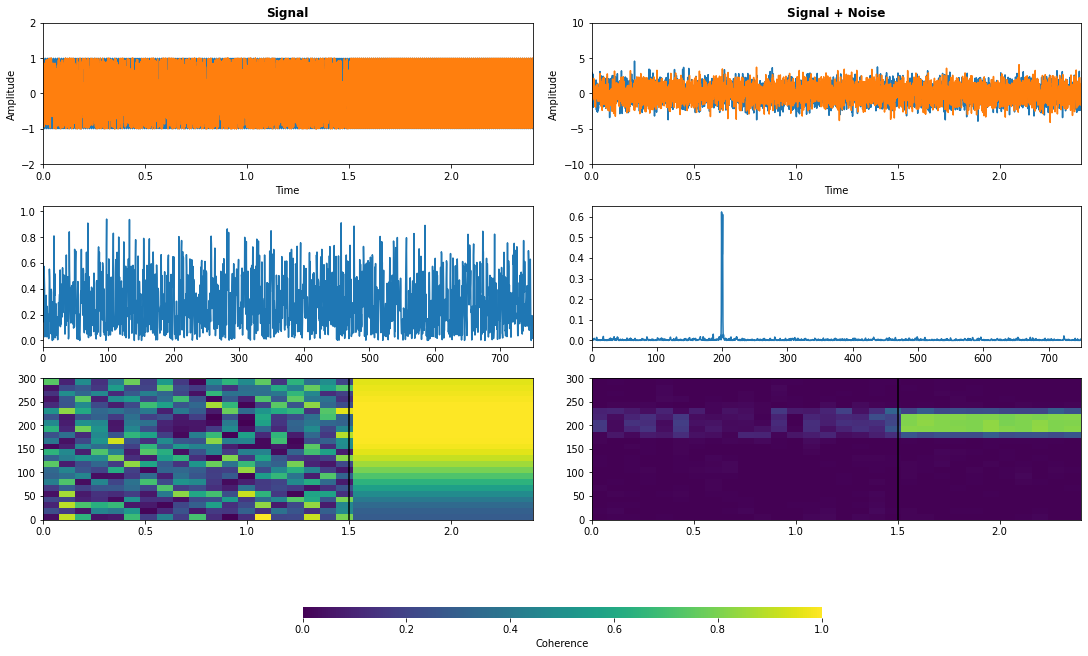

In [11]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.coherence_magnitude()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.coherence_magnitude()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Imaginary Coherence

frequency resolution: 50.0


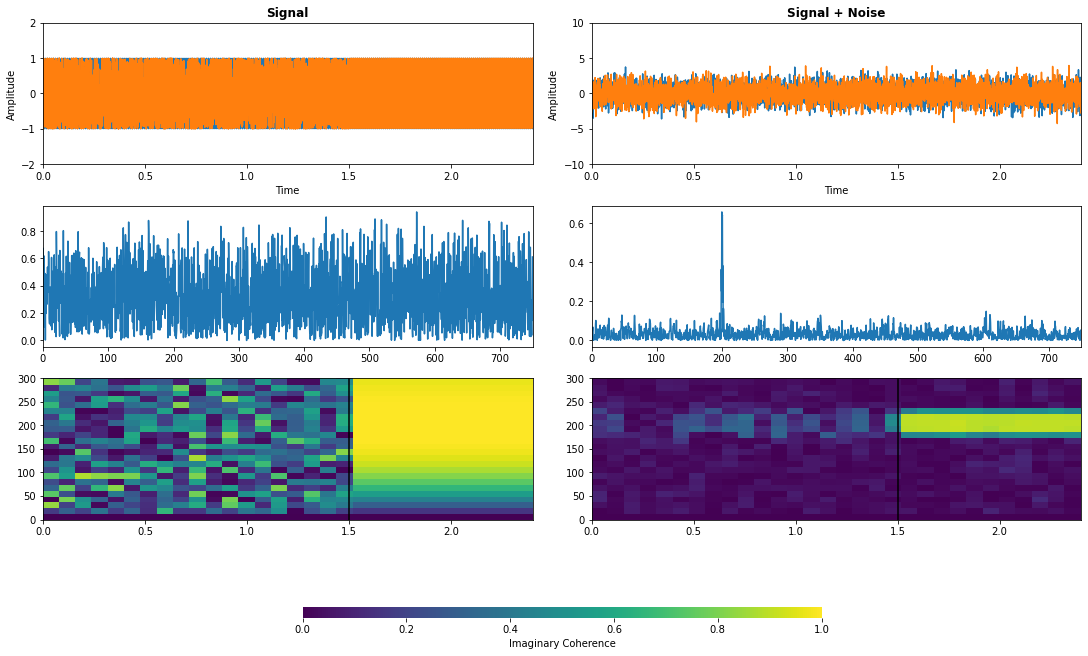

In [12]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.imaginary_coherence()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.imaginary_coherence()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.imaginary_coherence()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.imaginary_coherence()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Imaginary Coherence",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Phase Locking Value

frequency resolution: 50.0


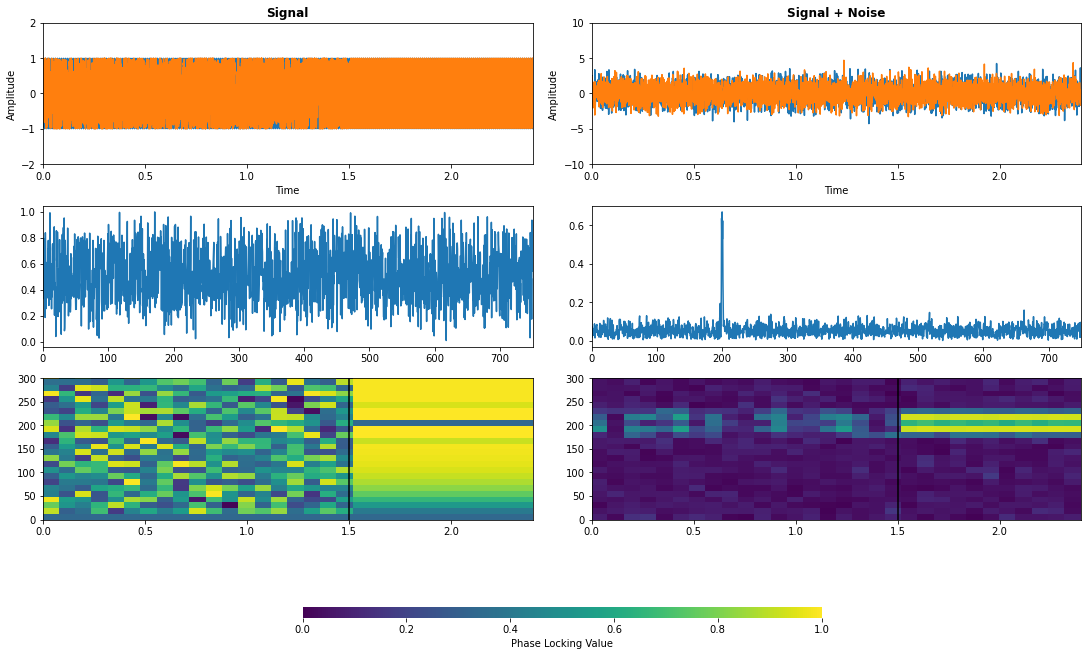

In [13]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.phase_locking_value()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.phase_locking_value()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.phase_locking_value()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.phase_locking_value()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Phase Locking Value",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Phase Lag Index

frequency resolution: 50.0


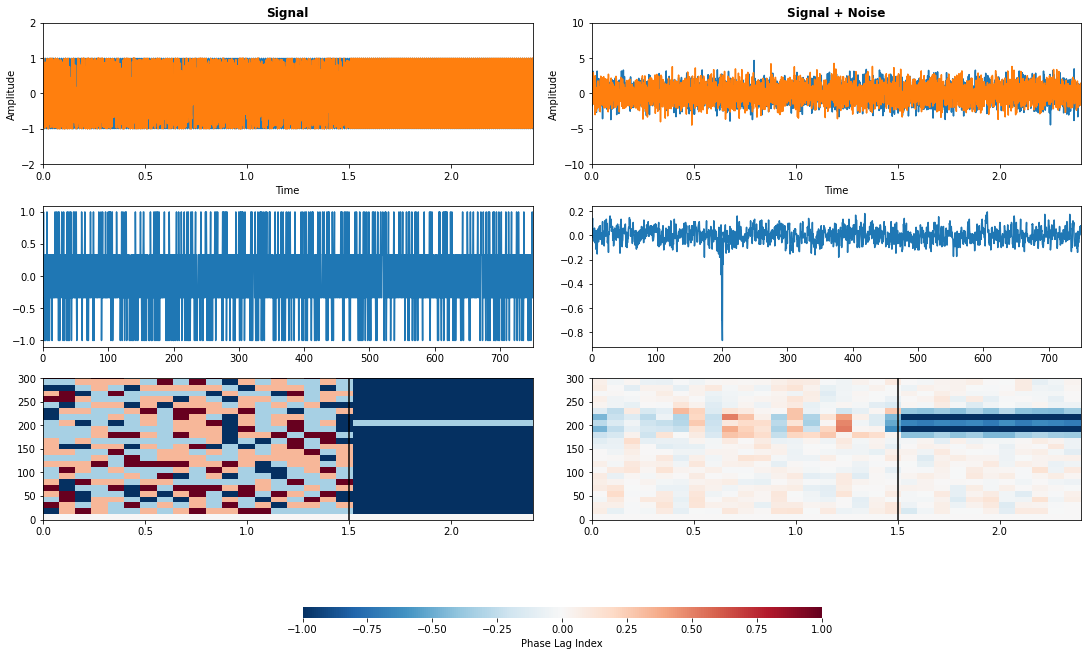

In [14]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.phase_lag_index()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.phase_lag_index()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Phase Lag Index",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Weighted Phase Lag Index

frequency resolution: 50.0


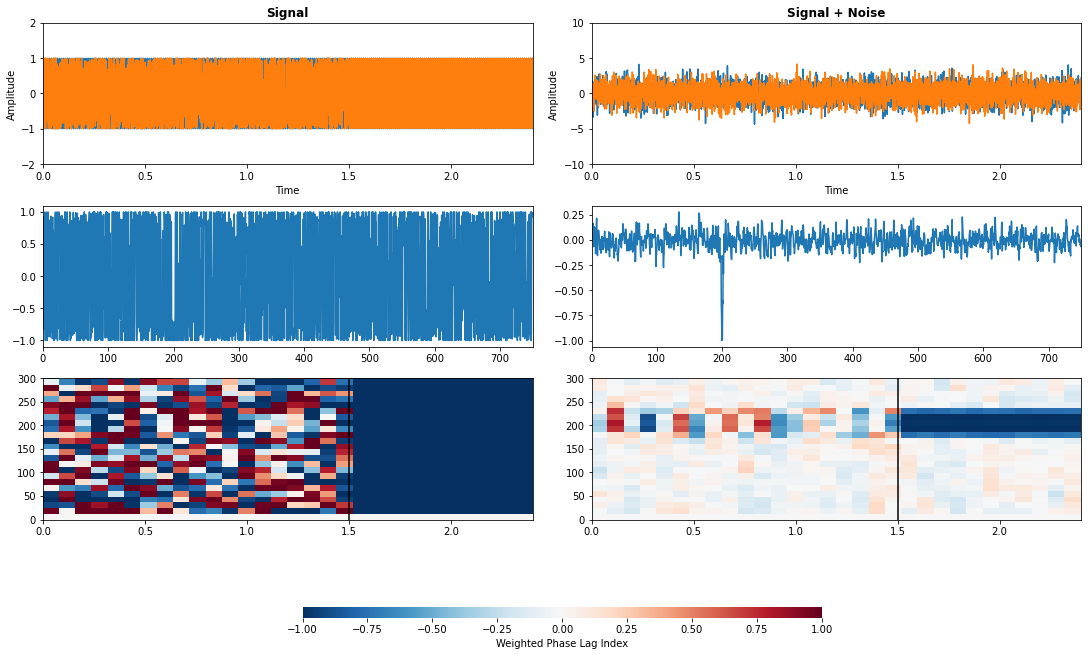

In [15]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.weighted_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.weighted_phase_lag_index()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=-1.0,
    vmax=1.0,
    cmap="RdBu_r",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Weighted Phase Lag Index",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


frequency resolution: 50.0


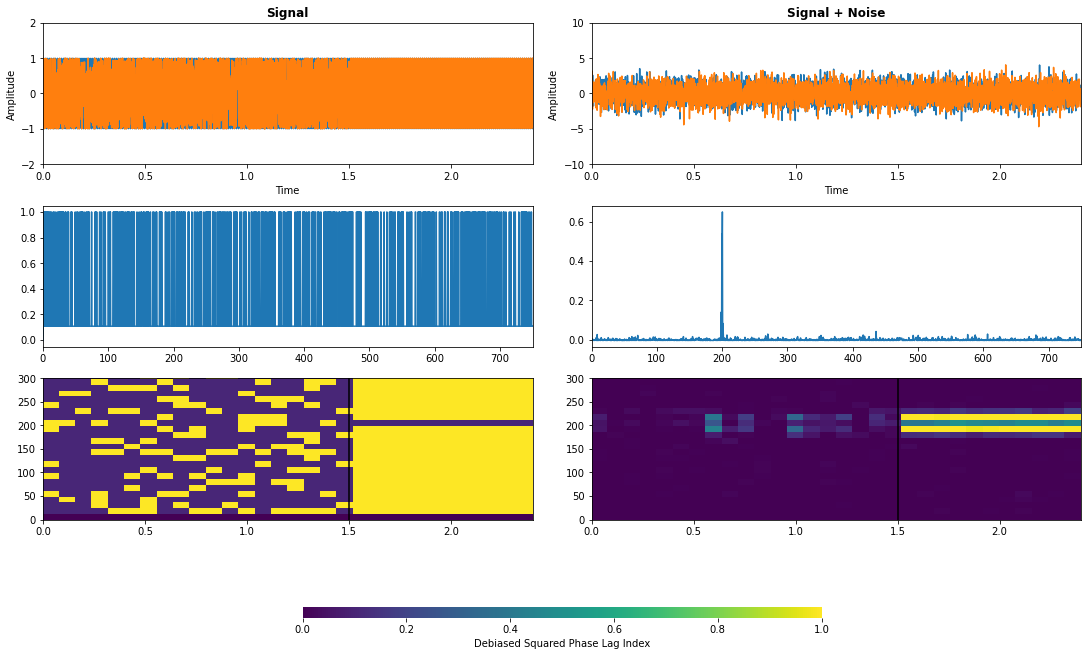

In [16]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(
    c.frequencies, c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze()
)
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(
    c.frequencies, c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze()
)
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.debiased_squared_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Debiased Squared Phase Lag Index",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Debiased Squared Weighted Phase Lag Index

frequency resolution: 50.0


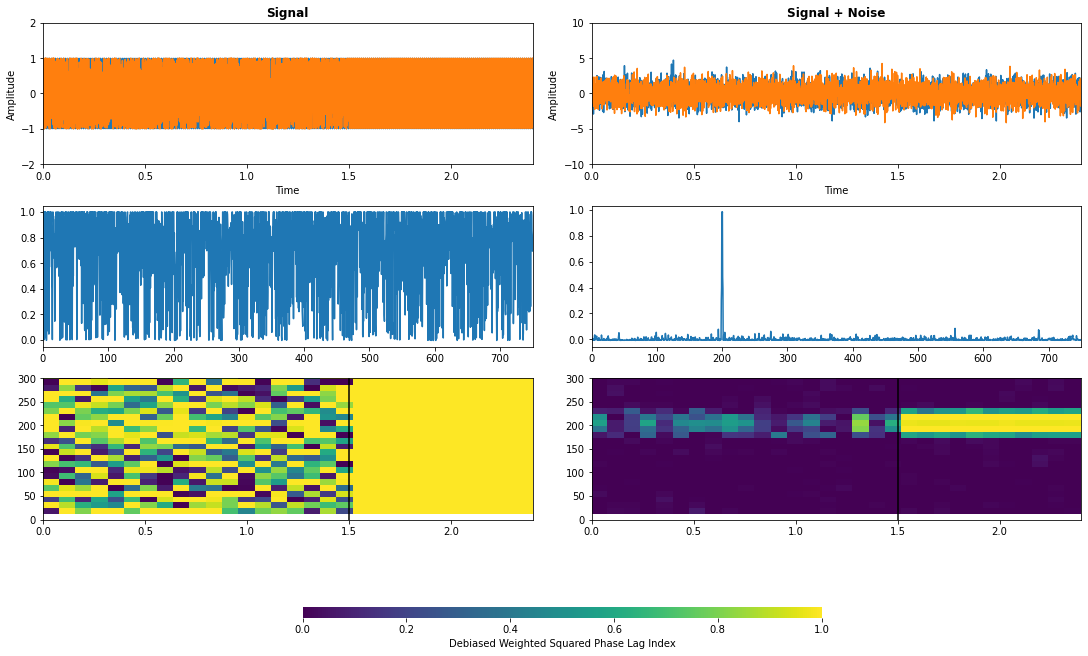

In [17]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(
    c.frequencies, c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze()
)
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(
    c.frequencies, c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze()
)
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.debiased_squared_weighted_phase_lag_index()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Debiased Weighted Squared Phase Lag Index",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Pairwise Phase Consistency

frequency resolution: 50.0


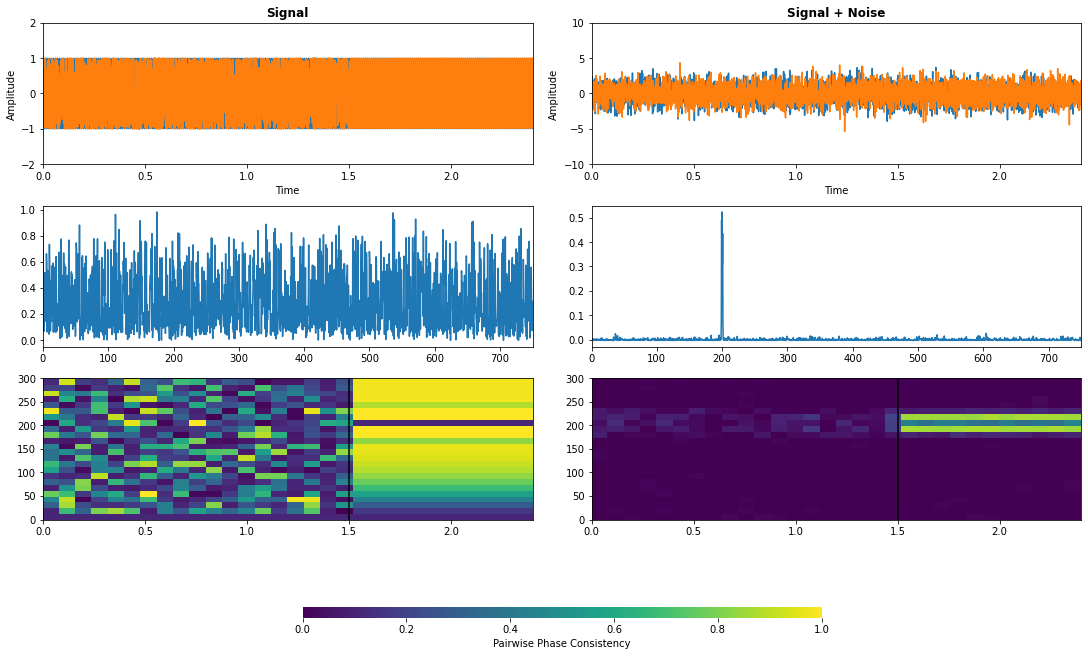

In [18]:
time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 2
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)[
    :, np.newaxis
]
signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0] = np.sin(2 * np.pi * time * frequency_of_interest)
phase_offset = np.random.uniform(-np.pi, np.pi, size=(n_time_samples, 1))
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, 1] = np.sin((2 * np.pi * time * frequency_of_interest) + phase_offset)
noise = np.random.normal(0, 1, signal.shape)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), constrained_layout=True)
axes[0, 0].set_title("Signal", fontweight="bold")
axes[0, 0].plot(time, signal[:, 0, 0], label="Signal1")
axes[0, 0].plot(time, signal[:, 0, 1], label="Signal2")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].set_xlim(time_extent)
axes[0, 0].set_ylim((-2, 2))

axes[0, 1].set_title("Signal + Noise", fontweight="bold")
axes[0, 1].plot(time, signal[:, 0, :] + noise[:, 0, :])
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].set_xlim(time_extent)
axes[0, 1].set_ylim((-10, 10))

m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 0].plot(c.frequencies, c.pairwise_phase_consistency()[..., 0, 1].squeeze())
axes[1, 0].set_xlim((0, m.nyquist_frequency))

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies)
axes[1, 1].plot(c.frequencies, c.pairwise_phase_consistency()[..., 0, 1].squeeze())
axes[1, 1].set_xlim((0, m.nyquist_frequency))


m = Multitaper(
    signal,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 0].pcolormesh(
    time_grid,
    freq_grid,
    c.pairwise_phase_consistency()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 0].set_ylim((0, 300))
axes[2, 0].set_xlim(time_extent)
axes[2, 0].axvline(1.5, color="black")

m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

mesh = axes[2, 1].pcolormesh(
    time_grid,
    freq_grid,
    c.pairwise_phase_consistency()[..., 0, 1].squeeze().T,
    vmin=0.0,
    vmax=1.0,
    cmap="viridis",
)
axes[2, 1].set_ylim((0, 300))
axes[2, 1].set_xlim(time_extent)
axes[2, 1].axvline(1.5, color="black")

cb = fig.colorbar(
    mesh,
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Pairwise Phase Consistency",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


### Group Delay


#### Signal \#1 leads Signal \#2

[Text(1, 0, 'x1 → x2')]

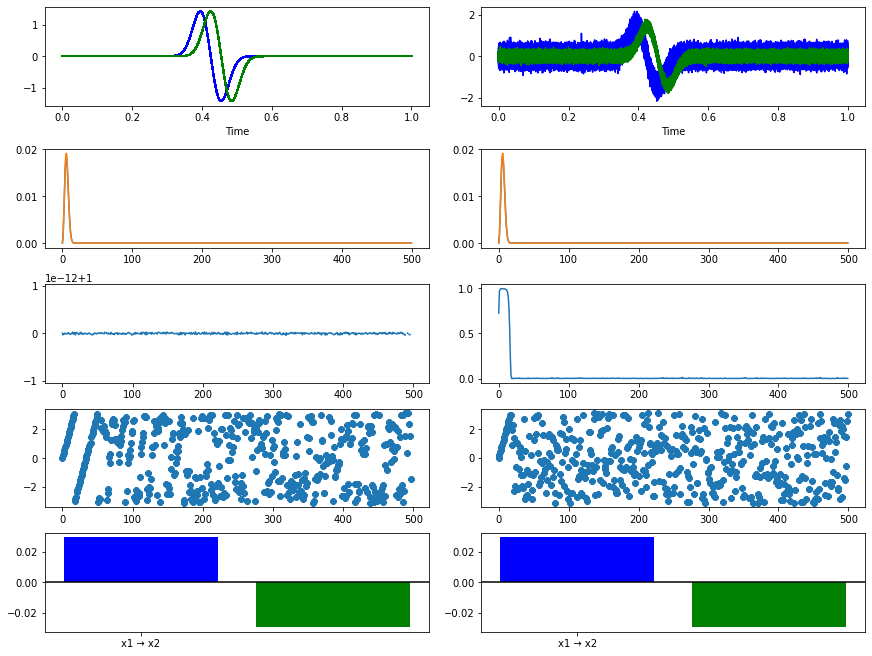

In [19]:
import scipy

sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = c.group_delay(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 0].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")
axis_handles[4, 0].set_xticks([1])
axis_handles[4, 0].set_xticklabels(["x1 → x2"])


m = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = c.group_delay(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 1].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")
axis_handles[4, 1].set_xticks([1])
axis_handles[4, 1].set_xticklabels(["x1 → x2"])


#### Signal \#2 leads Signal \#1

[Text(1, 0, 'x1 → x2')]

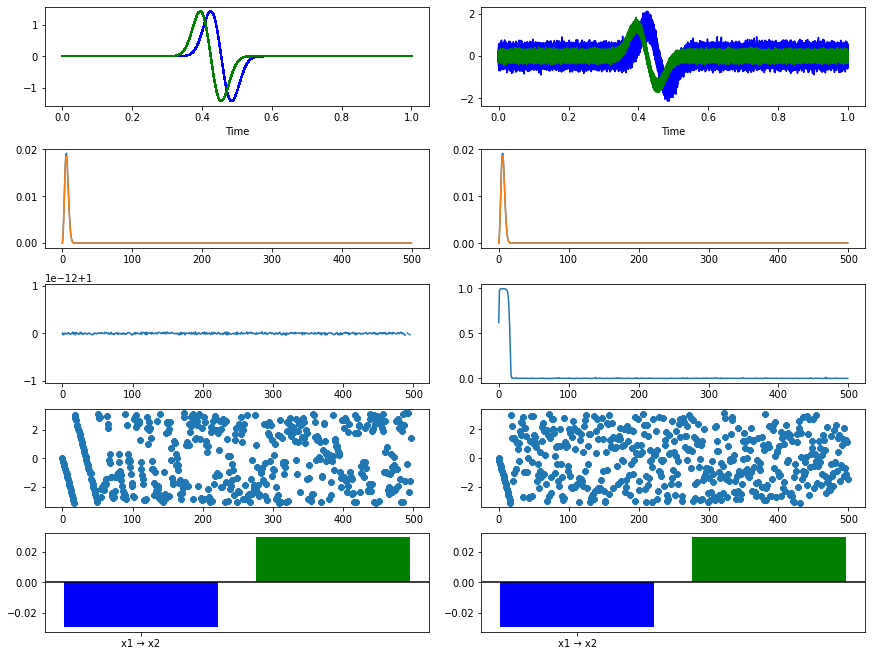

In [20]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = c.group_delay(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 0].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")
axis_handles[4, 0].set_xticks([1])
axis_handles[4, 0].set_xticklabels(["x1 → x2"])


m = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

delay, slope, r_value = c.group_delay(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 1].bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")
axis_handles[4, 1].set_xticks([1])
axis_handles[4, 1].set_xticklabels(["x1 → x2"])


#### Signal \#2 leads Signal \#1 over time

(0.0, 2.0)

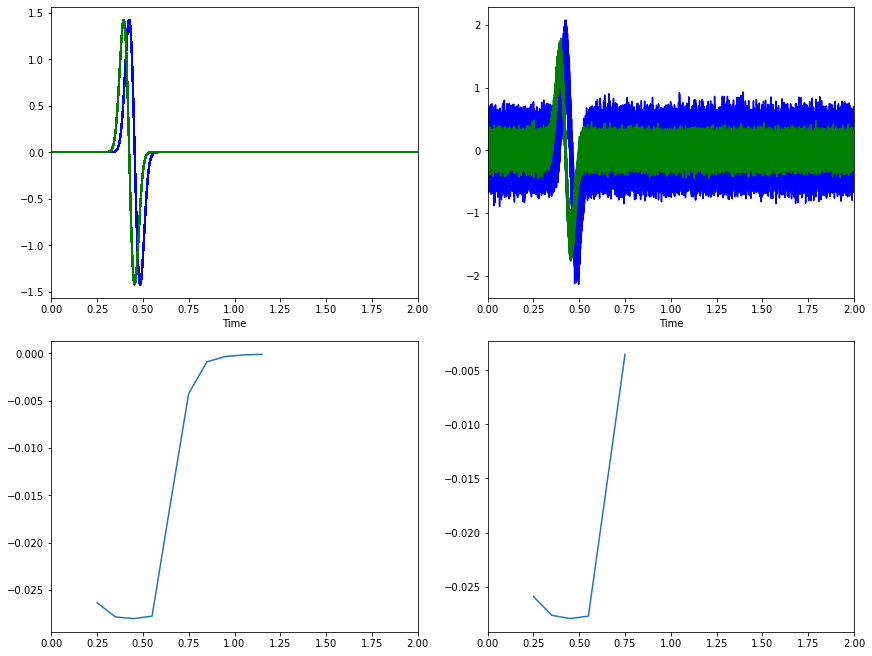

In [21]:
sampling_frequency = 1000
time_extent = (0, 2)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")
axis_handles[0, 0].set_xlim(time_extent)

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")
axis_handles[0, 1].set_xlim(time_extent)

m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

delay, slope, r_value = c.group_delay(
    frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution
)
axis_handles[1, 0].plot(c.time + m.time_window_duration / 2, delay[..., 0, 1])
axis_handles[1, 0].set_xlim(time_extent)

m = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

delay, slope, r_value = c.group_delay(
    frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution
)
axis_handles[1, 1].plot(c.time + m.time_window_duration / 2, delay[..., 0, 1])
axis_handles[1, 1].set_xlim(time_extent)


## Phase Slope Index

#### Signal \#1 leads Signal \#2

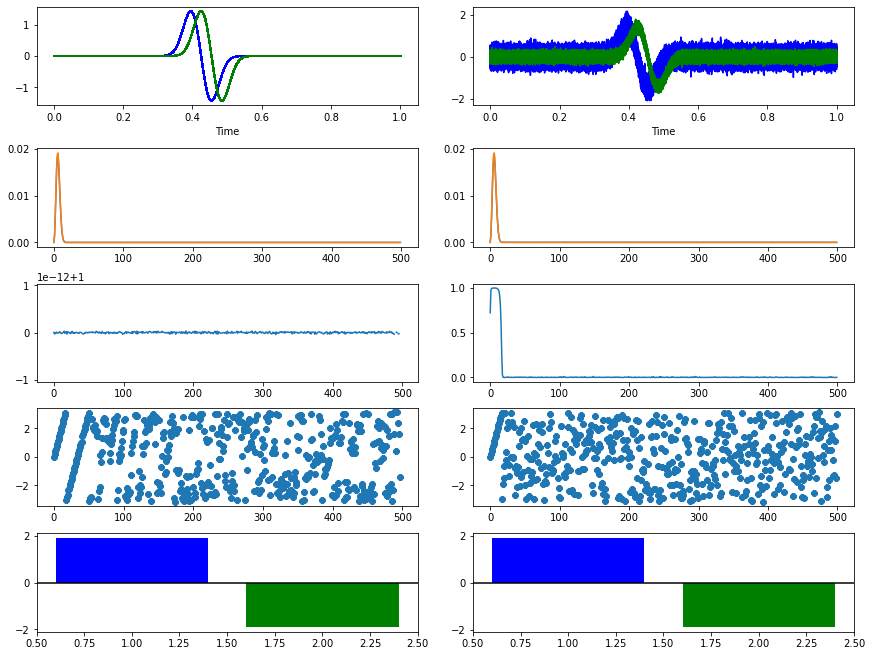

In [22]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = c.phase_slope_index(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 0].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")

m = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = c.phase_slope_index(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 1].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")


#### Signal \#2 leads Signal \#1

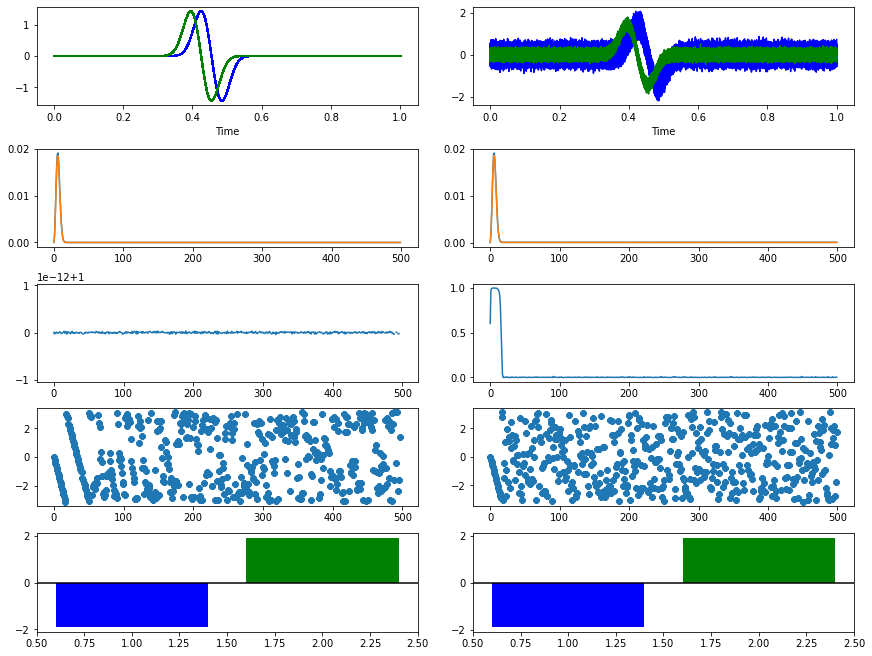

In [23]:
sampling_frequency = 1000
time_extent = (0, 1)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(5, 2, figsize=(12, 9), constrained_layout=True)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_xlabel("Time")

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_xlabel("Time")

m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 0].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 0].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 0].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 0].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = c.phase_slope_index(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 0].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 0].set_xlim((0.5, 2.5))
axis_handles[4, 0].axhline(0, color="black")

m = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

axis_handles[1, 1].plot(c.frequencies, c.power()[..., 0].squeeze())
axis_handles[1, 1].plot(c.frequencies, c.power()[..., 1].squeeze())
axis_handles[2, 1].plot(c.frequencies, c.coherence_magnitude()[..., 0, 1].squeeze())
axis_handles[3, 1].plot(
    c.frequencies,
    c.coherence_phase()[..., 0, 1].squeeze(),
    linestyle="None",
    marker="8",
)

psi = c.phase_slope_index(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
axis_handles[4, 1].bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"]
)
axis_handles[4, 1].set_xlim((0.5, 2.5))
axis_handles[4, 1].axhline(0, color="black")


In [24]:
sampling_frequency = 1000
time_extent = (0, 2)
n_trials = 500
time_halfbandwidth_product = 1

n_time_samples = ((time_extent[1] - time_extent[0]) * sampling_frequency) + 1
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples)

signal1 = (
    scipy.stats.norm.pdf(time, 0.43, 0.025) - scipy.stats.norm.pdf(time, 0.48, 0.025)
) / 10
signal1 = signal1[:, np.newaxis] * np.ones((len(time), n_trials))
signal2 = (
    scipy.stats.norm.pdf(time, 0.40, 0.025) - scipy.stats.norm.pdf(time, 0.45, 0.025)
) / 10
signal2 = signal2[:, np.newaxis] * np.ones((len(time), n_trials))

noise1 = np.random.normal(0, 0.2, size=(len(time), n_trials))
noise2 = np.random.normal(0, 0.1, size=(len(time), n_trials))
data1 = signal1 + noise1
data2 = signal2 + noise2

signals = np.stack((signal1, signal2), axis=-1)
data = np.stack((data1, data2), axis=-1)

fig, axis_handles = plt.subplots(
    2, 2, figsize=(12, 9), constrained_layout=True, sharex=True
)
axis_handles[0, 0].plot(time, signal1, color="blue")
axis_handles[0, 0].plot(time, signal2, color="green")
axis_handles[0, 0].set_title("Signals")
axis_handles[0, 0].set_xlim(time_extent)

axis_handles[0, 1].plot(time, data1, color="blue")
axis_handles[0, 1].plot(time, data2, color="green")
axis_handles[0, 1].set_title("Signals")
axis_handles[0, 1].set_xlim(time_extent)

m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

psi = c.phase_slope_index(
    frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution
)
axis_handles[1, 0].plot(
    c.time + m.time_window_duration / 2,
    psi[..., 0, 1],
    c.time + m.time_window_duration / 2,
    psi[..., 1, 0],
)
axis_handles[1, 0].set_xlim(time_extent)
axis_handles[1, 0].set_xlabel("Time [s]")
axis_handles[1, 0].set_ylabel("Phase Slope Index")

m = Multitaper(
    data,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.500,
    time_window_step=0.100,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

psi = c.phase_slope_index(
    frequencies_of_interest=[0, 15], frequency_resolution=m.frequency_resolution
)
axis_handles[1, 1].plot(
    c.time + m.time_window_duration / 2,
    psi[..., 0, 1],
    c.time + m.time_window_duration / 2,
    psi[..., 1, 0],
)
axis_handles[1, 1].set_xlim(time_extent)
axis_handles[1, 1].set_xlabel("Time [s]")
axis_handles[1, 1].set_ylabel("Phase Slope Index")


Text(0, 0.5, 'Phase Slope Index')

### Canonical Coherence

The advantage of canonical coherence is that it can be more statistically powerful than coherence because it is combining coherence from groups.

frequency resolution: 50.0


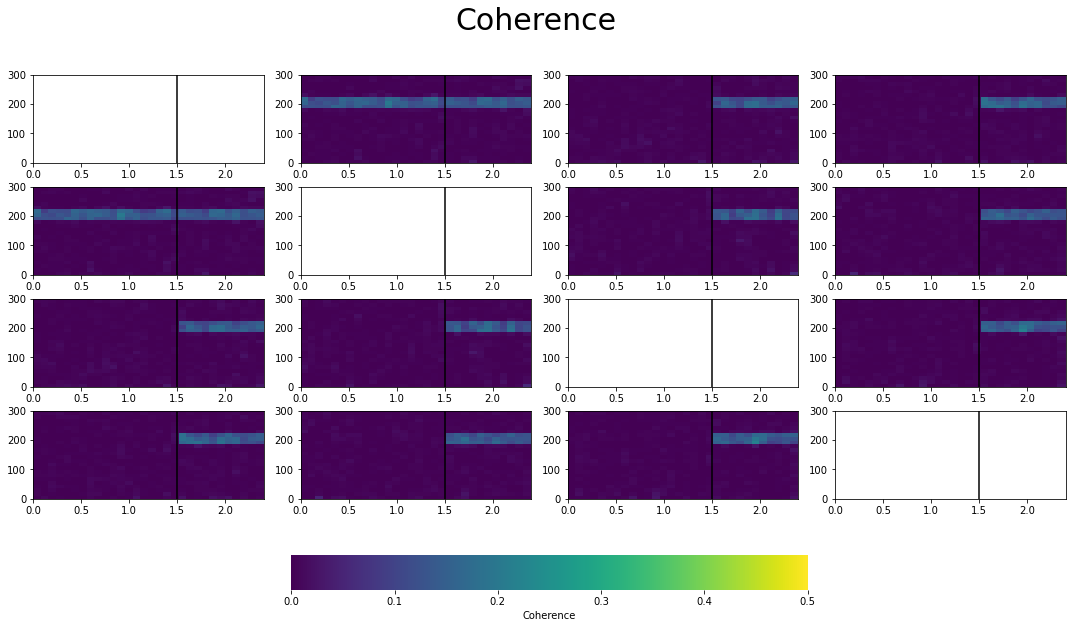

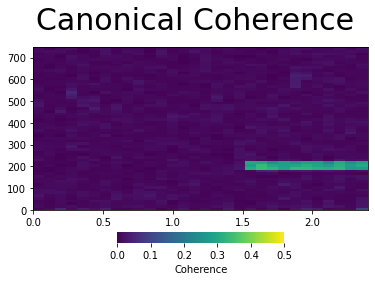

In [ ]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 4
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = np.sin(2 * np.pi * time * frequency_of_interest)[
    :, np.newaxis, np.newaxis
] * np.ones((1, n_trials, 2))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(
    -np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals)
)
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset
)
noise = np.random.normal(0, 4, signal.shape)


m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

fig, axes = plt.subplots(nrows=n_signals, ncols=n_signals, figsize=(15, 9))
meshes = list()
for ind1, ind2 in product(range(n_signals), range(n_signals)):
    if ind1 == ind2:
        vmin, vmax = c.power().min(), c.power().max()
    else:
        vmin, vmax = 0, 0.5
    mesh = axes[ind1, ind2].pcolormesh(
        time_grid,
        freq_grid,
        c.coherence_magnitude()[..., ind1, ind2].squeeze().T,
        vmin=vmin,
        vmax=vmax,
        cmap="viridis",
    )
    meshes.append(mesh)
    axes[ind1, ind2].set_ylim((0, 300))
    axes[ind1, ind2].set_xlim(time_extent)
    axes[ind1, ind2].axvline(1.5, color="black")

plt.suptitle("Coherence", y=1.02, fontsize=30)
plt.tight_layout()
cb = fig.colorbar(
    meshes[-2],
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


group_labels = (["a"] * (n_signals - n_other_signals)) + (["b"] * n_other_signals)
canonical_coherence, pair_labels = c.canonical_coherence(group_labels)
fig = plt.figure()
mesh = plt.pcolormesh(
    time_grid,
    freq_grid,
    canonical_coherence[..., 0, 1].squeeze().T,
    vmin=0,
    vmax=0.5,
    cmap="viridis",
)
plt.suptitle("Canonical Coherence", y=1.02, fontsize=30)
cb = fig.colorbar(
    mesh,
    ax=plt.gca(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)


#### More signals, higher noise

frequency resolution: 50.0


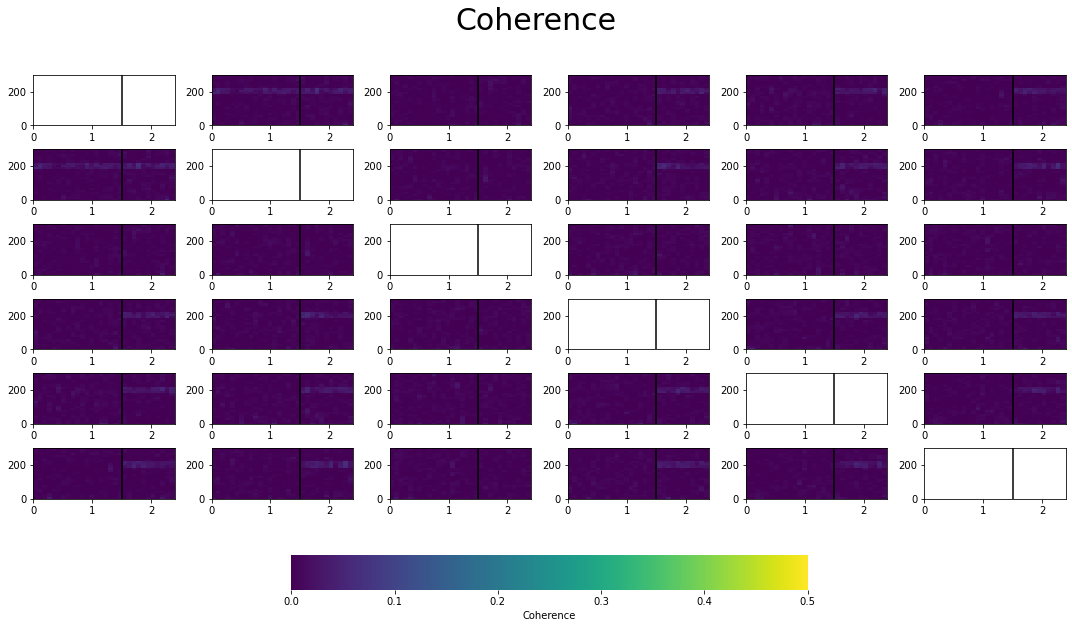

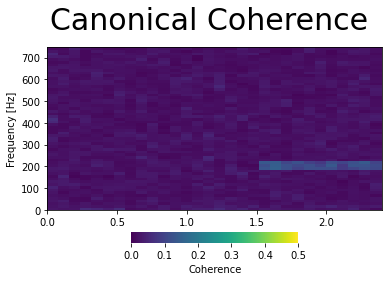

In [ ]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 6
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = np.sin(2 * np.pi * time * frequency_of_interest)[
    :, np.newaxis, np.newaxis
] * np.ones((1, n_trials, 2))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(
    -np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals)
)
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset
)
noise = np.random.normal(10, 7, signal.shape)


m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)

fig, axes = plt.subplots(nrows=n_signals, ncols=n_signals, figsize=(15, 9))
meshes = list()
for ind1, ind2 in product(range(n_signals), range(n_signals)):
    if ind1 == ind2:
        vmin, vmax = c.power().min(), c.power().max()
    else:
        vmin, vmax = 0, 0.5
    mesh = axes[ind1, ind2].pcolormesh(
        time_grid,
        freq_grid,
        c.coherence_magnitude()[..., ind1, ind2].squeeze().T,
        vmin=vmin,
        vmax=vmax,
        cmap="viridis",
    )
    meshes.append(mesh)
    axes[ind1, ind2].set_ylim((0, 300))
    axes[ind1, ind2].set_xlim(time_extent)
    axes[ind1, ind2].axvline(1.5, color="black")

plt.suptitle("Coherence", y=1.02, fontsize=30)
plt.tight_layout()
cb = fig.colorbar(
    meshes[-2],
    ax=axes.ravel().tolist(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)
print("frequency resolution: {}".format(m.frequency_resolution))


group_labels = (["a"] * (n_signals - n_other_signals)) + (["b"] * n_other_signals)
canonical_coherence, pair_labels = c.canonical_coherence(group_labels)
fig = plt.figure()
mesh = plt.pcolormesh(
    time_grid,
    freq_grid,
    canonical_coherence[..., 0, 1].squeeze().T,
    vmin=0,
    vmax=0.5,
    cmap="viridis",
)
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.suptitle("Canonical Coherence", y=1.02, fontsize=30)
cb = fig.colorbar(
    mesh,
    ax=plt.gca(),
    orientation="horizontal",
    shrink=0.5,
    aspect=15,
    pad=0.1,
    label="Coherence",
)
cb.outline.set_linewidth(0)


### Global Coherence

Global coherence finds the linear combinations of signals that maximizes the power at a given frequency.

Text(0, 0.5, 'Frequency [Hz]')

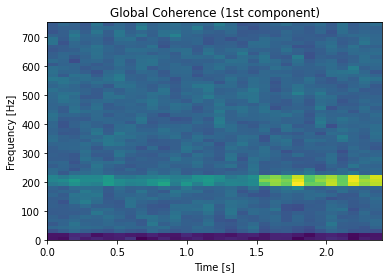

In [ ]:
from itertools import product

time_halfbandwidth_product = 2
frequency_of_interest = 200
sampling_frequency = 1500
time_extent = (0, 2.400)
n_trials = 100
n_signals = 6
n_time_samples = int(((time_extent[1] - time_extent[0]) * sampling_frequency) + 1)
time = np.linspace(time_extent[0], time_extent[1], num=n_time_samples, endpoint=True)

signal = np.zeros((n_time_samples, n_trials, n_signals))
signal[:, :, 0:2] = np.sin(2 * np.pi * time * frequency_of_interest)[
    :, np.newaxis, np.newaxis
] * np.ones((1, n_trials, 2))

other_signals = (n_signals + 1) // 2
n_other_signals = n_signals - other_signals
phase_offset = np.random.uniform(
    -np.pi, np.pi, size=(n_time_samples, n_trials, n_other_signals)
)
phase_offset[np.where(time > 1.5), :] = np.pi / 2
signal[:, :, other_signals:] = np.sin(
    (2 * np.pi * time[:, np.newaxis, np.newaxis] * frequency_of_interest) + phase_offset
)
noise = np.random.normal(10, 7, signal.shape)


m = Multitaper(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

global_coherence, unnormalized_global_coherence = c.global_coherence()
global_coherence.shape  # n_time, n_frequencies, n_components
time_grid, freq_grid = np.meshgrid(
    np.append(c.time, time_extent[-1]), np.append(c.frequencies, m.nyquist_frequency)
)
plt.figure()
plt.pcolormesh(
    time_grid,
    freq_grid,
    global_coherence[:, c.all_frequencies >= 0, 0].T,
    shading="auto",
)
plt.title("Global Coherence (1st component)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")


#### Xarray interface

The xarray interface provides three things:
1. a nicely labeled output for the connectivity dimensions
2. a unified way of estimating the spectral power and connectivity together.
3. easy and quick plotting

In [ ]:
coherence_magnitude = multitaper_connectivity(
    signal + noise,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    time_window_duration=0.080,
    time_window_step=0.080,
    method="coherence_magnitude",
)

coherence_magnitude


<xarray.DataArray 'coherence_magnitude' (time: 30, frequency: 60, source: 6, target: 6)>
array([[[[           nan, 1.35753236e-04, 6.69973917e-04,
          1.06385588e-02, 2.53451029e-03, 2.49681066e-04],
         [1.35753236e-04,            nan, 6.20367518e-05,
          4.12790761e-04, 4.02563910e-05, 1.14990999e-04],
         [6.69973917e-04, 6.20367518e-05,            nan,
          3.79560276e-03, 1.81596754e-02, 6.73832787e-03],
         [1.06385588e-02, 4.12790761e-04, 3.79560276e-03,
                     nan, 2.16017544e-03, 2.57953573e-04],
         [2.53451029e-03, 4.02563910e-05, 1.81596754e-02,
          2.16017544e-03,            nan, 9.14067424e-05],
         [2.49681066e-04, 1.14990999e-04, 6.73832787e-03,
          2.57953573e-04, 9.14067424e-05,            nan]],

        [[           nan, 4.24223149e-03, 3.34328675e-03,
          5.30427862e-04, 1.26103427e-02, 1.17974124e-02],
         [4.24223149e-03,            nan, 1.16141910e-03,
          4.68072372e-04, 1.68161779e-02, 8.14569384e-04],
         [3.34328675e-03, 1.16141910e-03,            nan,
          1.35436554e-02, 4.15608482e-03, 6.75178427e-04],
         [5.30427862e-04, 4.68072372e-04, 1.35436554e-02,
...
          1.61535443e-03, 2.43867834e-03, 1.18522246e-03],
         [3.35095122e-03, 1.49208303e-03, 1.61535443e-03,
                     nan, 2.42749729e-03, 1.35026380e-03],
         [2.03683646e-03, 9.60939444e-03, 2.43867834e-03,
          2.42749729e-03,            nan, 4.82677873e-03],
         [2.15888346e-03, 8.56732648e-04, 1.18522246e-03,
          1.35026380e-03, 4.82677873e-03,            nan]],

        [[           nan, 1.03410123e-03, 7.69774949e-04,
          6.07461541e-03, 1.11382206e-03, 1.33321564e-04],
         [1.03410123e-03,            nan, 3.41221428e-06,
          2.96559312e-03, 9.11875767e-03, 3.37173454e-03],
         [7.69774949e-04, 3.41221428e-06,            nan,
          4.13322814e-04, 3.01327627e-03, 3.67745041e-04],
         [6.07461541e-03, 2.96559312e-03, 4.13322814e-04,
                     nan, 4.80066016e-04, 4.33090499e-03],
         [1.11382206e-03, 9.11875767e-03, 3.01327627e-03,
          4.80066016e-04,            nan, 5.68706850e-03],
         [1.33321564e-04, 3.37173454e-03, 3.67745041e-04,
          4.33090499e-03, 5.68706850e-03,            nan]]]])
Coordinates:
  * time       (time) float64 0.0 0.08 0.16 0.24 0.32 ... 2.08 2.16 2.24 2.32
  * frequency  (frequency) float64 0.0 12.5 25.0 37.5 ... 712.5 725.0 737.5
  * source     (source) int64 0 1 2 3 4 5
  * target     (target) int64 0 1 2 3 4 5
Attributes: (12/15)
    mt_detrend_type:                constant
    mt_frequency_resolution:        50.0
    mt_is_low_bias:                 True
    mt_n_fft_samples:               120
    mt_n_signals:                   6
    mt_n_tapers:                    3
    ...                             ...
    mt_nyquist_frequency:           750.0
    mt_sampling_frequency:          1500
    mt_start_time:                  0
    mt_time_halfbandwidth_product:  2
    mt_time_window_duration:        0.08
    mt_time_window_step:            0.08

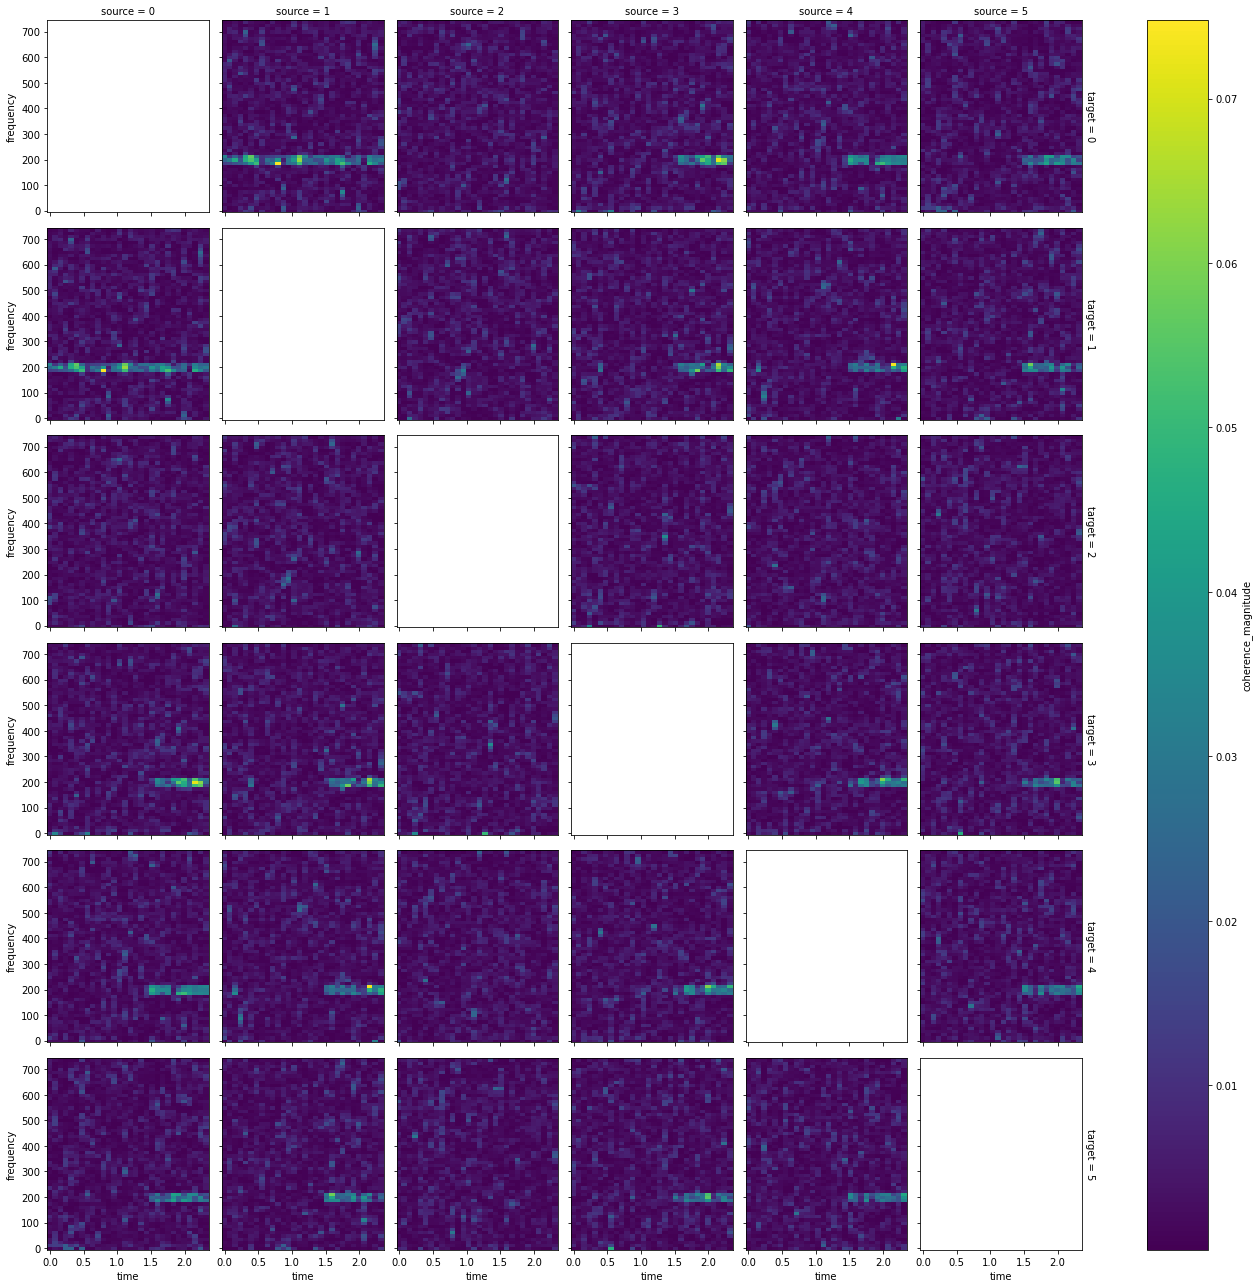

In [ ]:
coherence_magnitude.plot(col="source", row="target", x="time")
